In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import sympy as smp
import seaborn as sns

plt.rc('text', usetex=True)

from IPython.display import YouTubeVideo

C:\Users\saxion\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "https://upload.wikimedia.org/wikipedia/commons/f/f9/Electron_shell_029_Copper.svg", width=400)

In [4]:
#import sys
#sys.path.append('D:\Dropbox\python\ipython-circuitikz')
%install_ext circuitikz.py

Installed circuitikz.py. To use it, type:
  %load_ext circuitikz


C:\Users\saxion\Anaconda3\lib\site-packages\IPython\core\magics\extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [5]:
%reload_ext circuitikz

--------

# Electrische circuits DC: Week 6

-----

## Inhoud:

- Chapter 2: Voltage, Current, Resistance
- Chapter 3: Ohm's Law
- Chapter 4: Energy and Power
- Chapter 5: Series Circuits
- Chapter 6: Parallel Circuits
- Chapter 7: Series-Parallel Circuits
- Chapter 8: Circuit theorem and Conversions
- **Chapter 12: Capacitors**
- **Chapter 13: Inductors**

# RECAP  LAST WEEK

- Alle mogelijke oplos methoden

-----

# Vandaag:

- Hoofdstuk 12

- Tijdsafhankelijkheid
- Condensator
- Energie in condensator

[Khan academy](https://www.khanacademy.org/science/physics/circuits-topic/circuits-with-capacitors/v/capacitors-and-capacitance)

[National maglab](https://nationalmaglab.org/education/magnet-academy/watch-play/interactive/capacitor)

[Youtube RLC](https://www.youtube.com/watch?v=QACkML3hg6g)

-----

### Schematische weergave van een condensator:
![Capacitor](https://upload.wikimedia.org/wikipedia/commons/3/35/Parallel_plate_capacitor.svg)

Een condensator bestaat uit twee geleidende platen (ieder met oppervlakte $A$) die met de zekere afstand $d$ van elkaar afstaan. Ze worden gescheiden door een isolerend materiaal (Dielectricum). 

De condensator wordt gebruikt voor de opslag van lading (Q) en energie (W).

De capaciteit van een condensator zegt hoe goed de condensator is in het opslaan van lading, het is dus een materiaal eigenschap!

Enkele voorbeelden van werkelijke condensatoren:

![Cap](https://upload.wikimedia.org/wikipedia/commons/b/b9/Capacitors_%287189597135%29.jpg)

Een analogie voor een condensator is een elastisch vlies wat zich in een waterleiding bevindt (zie ook de wiki):

![Cap](https://upload.wikimedia.org/wikipedia/commons/c/c1/CapacitorHydraulicAnalogyAnimation.gif)

------
De capaciteit van een condensator is een materiaal eigenschap uitgedrukt in Farad [F] en gelijk aan de totale lading Q gedeelt door de spanning V. Oftwel het aantal Coulombs per eenheids voltages (aantal coulumbs bij een een spanning van 1 Volt)

$C~[F] = \dfrac{Q}{V}~\left[\dfrac{A \cdot s}{V}\right] =  \dfrac{Q}{V}~\left[\dfrac{C}{V}\right]$ 

anders geschreven:

$Q = C \cdot V$,   

$V = \dfrac{Q}{C}$

De capaciteit van de condensator wordt bepaald door permittiviteit $\epsilon=\epsilon_0 \epsilon_r$ (waarbij $\epsilon_0=8.85\cdot 10^{-12}$ [F/m] de permittiviteit in vacuum is en $\epsilon_r$ een relatieve materiaal constante [dimensieloos]) , plaat oppervlak $A$ en de afstand tussen de platen d. 

$C = \epsilon \dfrac{A}{d} [F]$

-----
### Energie in een condensator
----

De arbeid die men moet verrichttem om een lading te verplaatsen over een spannings (potentiaal) V:

$ U = \displaystyle\int^Q_0 V dq $

Echter is de spanning niet constant tijdens het opladen van de condensator vandaar dat je de integraal omgeschreven en vervolgens uitgewerkt moet worden:

$ U = \displaystyle\int^Q_0 \dfrac{q}{C} dq $.

Dit komt aan bod in **trillingen en golven** in het tweede jaar. De uitwerking van de integraal is:

\begin{align}
E_{el,pot} = & \frac{1}{2} \cdot Q \cdot V \\ 
 = & \frac{1}{2} \cdot C \cdot V^2
\end{align}

------

Het opladen en ontladen kost een zekere tijd.

De tijdconstante is een vast tijdsinterval dat gelijk is aan het product van weerstand en capaciteit van een RC circuit in serie:

$\tau = R \cdot C~[s]$

Op $t = 5\tau$ is de condensator 99% geladen. 

<IPython.core.display.Javascript object>


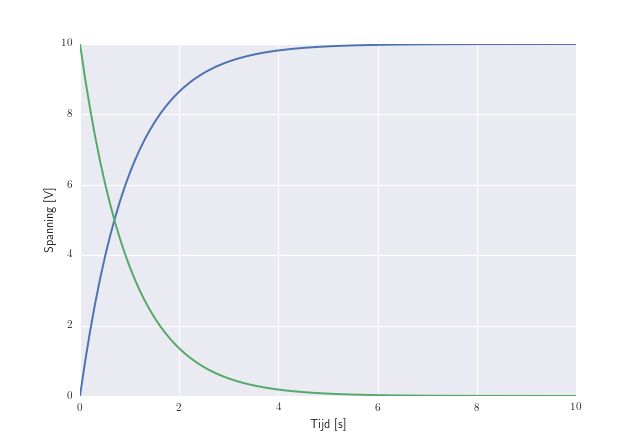

In [6]:
t = np.linspace(0,10,100)
R = 1e6
C = 1e-6
Vs = 10

tau = R*C

vc_op = Vs*(1-np.exp(-t/tau)) #opladen
vc_ont = Vs*np.exp(-t/tau) #ontladen
plt.plot(t,vc_op,t,vc_ont)
plt.xlabel('Tijd [s]')
plt.ylabel('Spanning [V]')

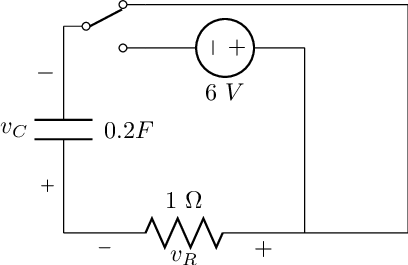

In [11]:
%%circuitikz filename=circuit1 dpi=175 options=american folder=circuits/college6/ replace=true

\begin{circuitikz}
\def\dx{0.315}
    \draw (0,3) node[spdt,xscale=1,yscale=1,anchor=in] (Swp) {};

    \draw (0,0) to[C,l_=$0.2 F$,v^=$v_C$] (Swp.in);
    
    \draw (Swp.out 2)
    to[V,v_=$6~V$] (3.5,{3-\dx});

    %\draw (Swp.out 1)
    %to[V,v^=$8~V$] (5,{3 + \dx});
    \draw (Swp.out 1)
    to[short]  (5,{3 + \dx});
    
    \draw (0,0) 
    to[R,l=$1~\Omega$,v>=$v_R$] (3.5,0)
    
    (3.5,0)
    to[short] (3.5,{3-\dx})
    
    (3.5,0)
    -| (5,{3 + \dx})
\end{circuitikz}    

Stel het volgende schakelpatroon voor:

<IPython.core.display.Javascript object>


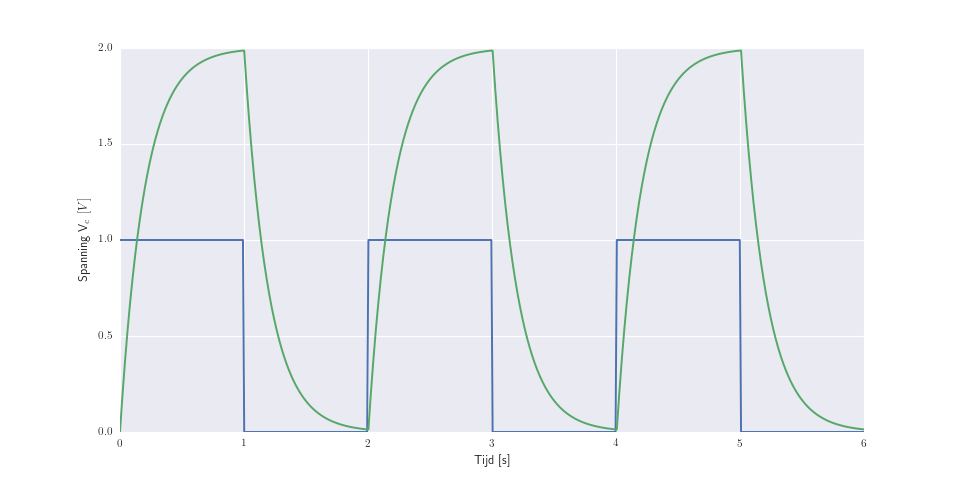

In [10]:
fs = 100
tEnd = 6
N = fs*tEnd

time = np.linspace(0,tEnd,N)
t = np.tile(np.linspace(0,1,fs), tEnd) #switching every second
squareInputSignal = np.tile(np.r_[np.ones(100), np.zeros(100)], tEnd/2)

R = 1
C = 0.2
tau = R*C

VIstart = 0 #initial voltage
VFstart = 2 #final voltage

VI = VIstart
VF = VFstart
prevState = 1

vOut = np.zeros(N)

for i in range(N):
    if squareInputSignal[i] == 0:
        if prevState == 1:
            VF = VIstart
            VI = vOut[i-1]
        prevState = 0
    else:
        if prevState == 0:
            VF = VFstart
            VI = vOut[i-1]
        prevState = 1    
    
    vOut[i] = VF + (VI-VF)*np.exp(-t[i]/tau)
        
plt.figure(num=None, figsize=(12, 6))
plt.plot(time,squareInputSignal)        
plt.plot(time,vOut)
plt.xlabel('Tijd [s]')
plt.ylabel('Spanning V_c~[V]')

In [9]:
#qtconsole

-----

## Extra links:

- [Wikiversity: Electric Circuit](https://en.wikiversity.org/wiki/Electric_Circuit_Analysis)
- [Pearson Floyd](https://media.pearsoncmg.com/bc/abp/floyd/)

--------------------

# $SUCCES = (Voorbereiding \cdot Geluk)^{Motivatie}$